# Sampling from common distributions
> From the ground up!

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### PRNG

#### Uniform distribution

I am pasting the code from vega-vis

```javascript
export default function(seed) {
  // Random numbers using a Linear Congruential Generator with seed value
  // Uses glibc values from https://en.wikipedia.org/wiki/Linear_congruential_generator
  return function() {
    seed = (1103515245 * seed + 12345) % 2147483647;
    return seed / 2147483647;
  };
}
```

In [93]:
def random_gen(seed, num):
    out = np.zeros(num)
    out[0] =  (1103515245 * seed + 12345) % 2147483647
    for i in range(1, num):
        out[i] = (1103515245 * out[i-1] + 12345) % 2147483647
    return out/2147483647
        
        

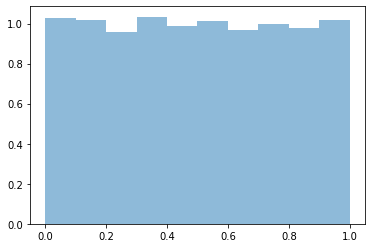

In [118]:
plt.hist(random_gen(0, 5000), density=True, alpha=0.5, label='Our implementation');

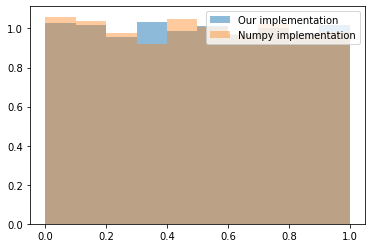

In [120]:
plt.hist(random_gen(0, 5000), density=True, alpha=0.5, label='Our implementation');
plt.hist(np.random.random(5000), density=True, alpha=0.4, label='Numpy implementation');
plt.legend()

### Inverse transform sampling

#### Exponential distribution

Borrowing from Wikipedia.

The probability density function (pdf) of an exponential distribution is
$$
f(x ; \lambda)=\left\{\begin{array}{ll}
\lambda e^{-\lambda x} & x \geq 0 \\
0 & x \leq 0
\end{array}\right.
$$

The exponential distribution is sometimes parametrized in terms of the scale parameter $\beta=1 / \lambda:$
$$
f(x ; \beta)=\left\{\begin{array}{ll}
\frac{1}{\beta} e^{-x / \beta} & x \geq 0 \\
0 & x<0
\end{array}\right.
$$

The cumulative distribution function is given by
$$
F(x ; \lambda)=\left\{\begin{array}{ll}
1-e^{-\lambda x} & x \geq 0 \\
0 & x<0
\end{array}\right.
$$

In [19]:
from scipy.stats import expon
rvs = [expon(scale=s) for s in [1/1., 1/2., 1/3.]]

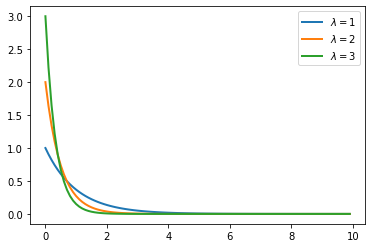

In [22]:
x = np.arange(0, 10, 0.1)
for i, lambda_val in enumerate([1, 2, 3]):
    plt.plot(x, rvs[i].pdf(x), lw=2, label=r'$\lambda=%s$' %lambda_val)
plt.legend()

For the purposes of this notebook, I will be looking only at the standard exponential or set the scale to 1.

Let us now view the CDF of the standard exponential.

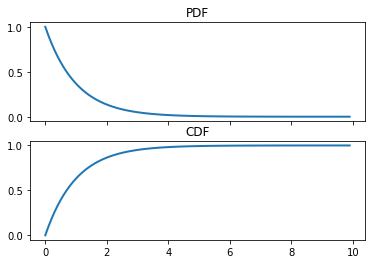

In [30]:
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot(x, expon().pdf(x), lw=2)
ax[0].set_title("PDF")
ax[1].set_title("CDF")
ax[1].plot(x, expon().cdf(x), lw=2,)

In [31]:
r = expon.rvs(size=1000)

/home/nipunbatra-pc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


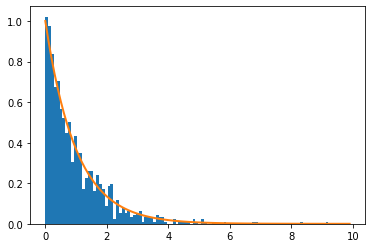

In [38]:
plt.hist(r, normed=True, bins=100)
plt.plot(x, expon().pdf(x), lw=2)

Inverse of the CDF of exponential 

The cumulative distribution function is given by
$$
F(x ; \lambda)=\left\{\begin{array}{ll}
1-e^{-\lambda x} & x \geq 0 \\
0 & x<0
\end{array}\right.
$$

Let us consider only $x \geq 0$.

Let $u = F^{-1}$ be the inverse of the CDF of $F$.

$$
u = 1-e^{-\lambda x} \\
1- u = e^{-\lambda x} \\
\log(1-u) = -\lambda x\\
x = -\frac{\log(1-u)}{\lambda}
$$

In [50]:
def inverse_transform(lambda_val, num_samples):
    u = np.random.random(num_samples)
    x = -np.log(1-u)/lambda_val
    return x

/home/nipunbatra-pc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


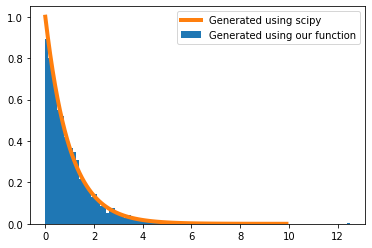

In [89]:
plt.hist(inverse_transform(1, 5000), bins=100, normed=True,label='Generated using our function');
plt.plot(x, expon().pdf(x), lw=4, label='Generated using scipy')
plt.legend()

#### Drawing samples from Laplace distribution

A random variable has a Laplace $(\mu, b)$ distribution if its probability density function is
$$
f(x | \mu, b)=\frac{1}{2 b} \exp \left(-\frac{|x-\mu|}{b}\right)
$$

$$F^{-1}(u)=\mu-b \operatorname{sgn}(u-0.5) \ln (1-2|u-0.5|)$$

In [67]:
def inverse_transform_laplace(b, mu, num_samples):
    u = np.random.random(num_samples)
    x = mu-b*np.sign(u-0.5)*np.log(1-2*np.abs(u-0.5))
    return x

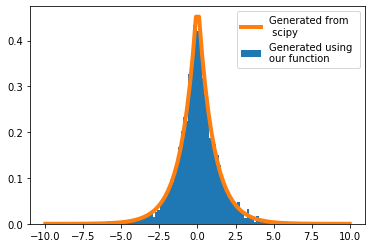

In [92]:
from scipy.stats import laplace
plt.hist(inverse_transform_laplace(1, 0, 5000),bins=100, density=True, label='Generated using \nour function');
x_n = np.linspace(-10, 10, 100)
plt.plot(x_n, laplace().pdf(x_n), lw=4, label='Generated from\n scipy')
plt.legend()

### Box-Muller transform

